Immport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load and Explore the Dataset

In [2]:
# Load the tips data set
tips = sns.load_dataset('tips')

# Display the first few rows of the data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data Preprocessing

In [3]:
# selecting independent (feature) and dependent (target) variables
X = tips[['total_bill']]  # independent variable always is in dataframe format
y = tips['tip']           # dependent variable always is in series format

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train.head()

,total_bill
63,18.29
229,22.12
13,18.43
153,24.55
14,14.83


In [4]:
tips.shape

(244, 7)

In [5]:
X_train.shape

(219, 1)

In [6]:
X_test.shape

(25, 1)

Model Training

In [7]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [8]:
model.predict([[100]])

c:\Users\gaura\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.57392213])

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8507520235672044


Visualization

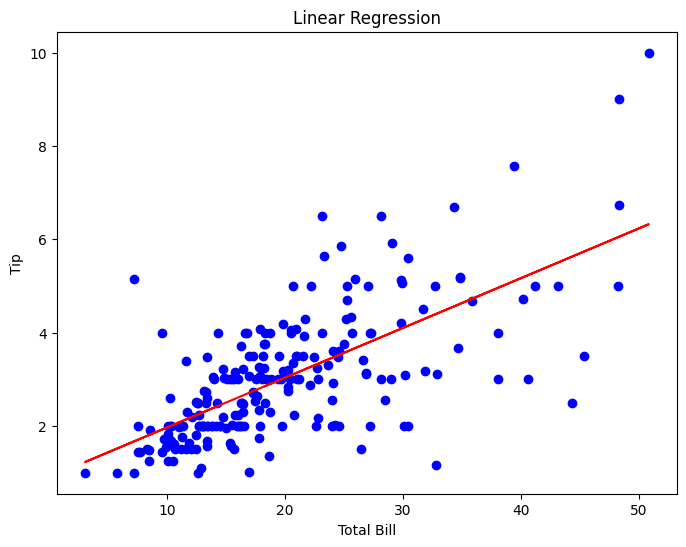

In [10]:
#Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Linear Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

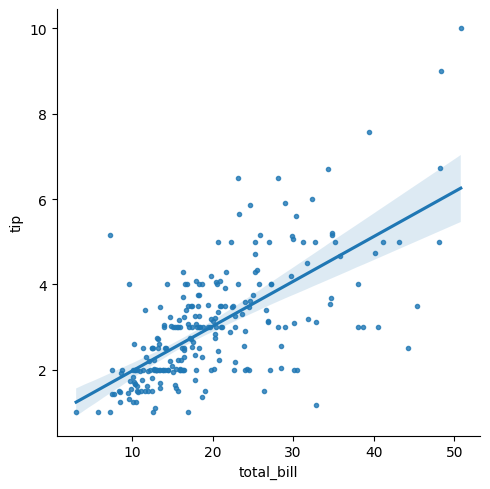

In [11]:
sns.lmplot(x='total_bill', y='tip', data=tips, markers='.')

Equation of the best-fit line

In [12]:
# calculate the cofficient of the best fit line
intercept = model.intercept_
slope = model.coef_[0]

# print the results
print("Intercept:", intercept)
print("Slope:", slope)
print("y={}+{}x".format(intercept, slope))

Intercept: 0.9016834817593309
Slope: 0.10672238646379087
y=0.9016834817593309+0.10672238646379087x


Calculate correlation cofficient and p-value

In [13]:
# Calculate correlation cofficient and p-value
from scipy import stats
corr, p_value = stats.pearsonr(tips['total_bill'], tips['tip'])

# print the results
print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.6757341092113647
P-value: 6.692470646863343e-34


Titanic 

In [14]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data Preprocessing

In [21]:
X = titanic[['age', 'fare', 'pclass']]
y = titanic['survived']

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_4512\3794496755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


,age,fare,pclass
42,28.0,7.8958,3
684,60.0,39.0000,2
605,36.0,15.5500,3
409,28.0,25.4667,3
740,28.0,30.0000,1


In [22]:
y_train.shape

(712,)

In [23]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7430167597765364


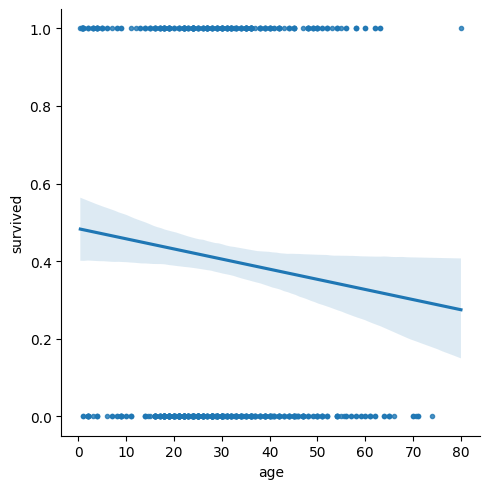

In [26]:
sns.lmplot(x='age', y='survived', data=titanic, markers='.')

In [27]:
# confusion matrix code

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[104  15]
 [ 31  29]]
